In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np

In [3]:
from utils.utils import load_data

FOLDER_PATH = "projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,1,a series of escapades demonstrating the adage ...,1,0
1,1,a series of escapades demonstrating the adage ...,2,0
2,1,a series,2,0
3,1,a,2,0
4,1,series,2,0
5,1,of escapades demonstrating the adage that what...,2,0
6,1,of,2,0
7,1,escapades demonstrating the adage that what is...,2,0
8,1,escapades,2,0
9,1,demonstrating the adage that what is good for ...,2,0


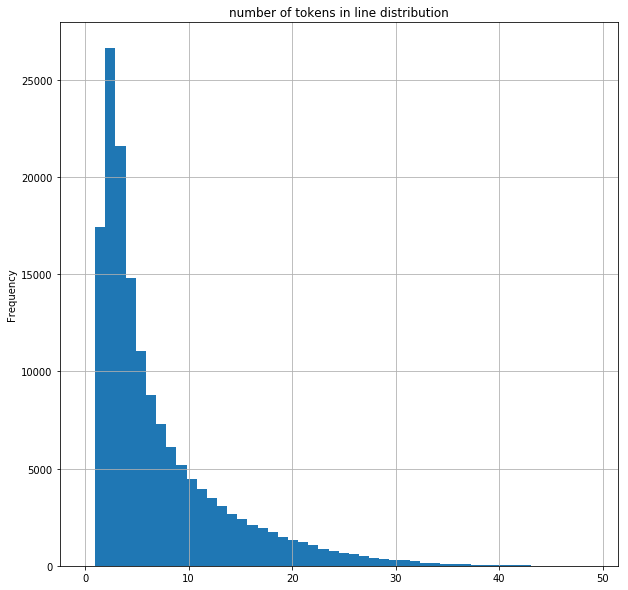

In [4]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# ELMO

In [5]:
from preprocess_data.preprocess_data import preprocess_data_word
from utils.utils_result import save_report, update_fit_params, evaluation

Using TensorFlow backend.


In [ ]:
# preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), data = preprocess_data_word(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=50)

In [ ]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (1,),
    "dtype": "string"
}

test_result_dict = {}

## Word Level

### RNN

In [8]:
from architecture.models import model_rnn

W0523 02:10:30.848950 140464570181504 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [9]:
# parameters setting
elmo_params_rnn = {
    "trainable": True,
    "output_dim": 1024,
    "output_type": "elmo"
}

model_params_elmo_rnn = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_rnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_rnn"
model_elmo_rnn = model_rnn(model_params_elmo_rnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Instructions for updating:
Colocations handled automatically by placer.


W0523 02:10:31.886052 140464570181504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0523 02:10:32.493597 140464570181504 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0523 02:10:32.553397 140464570181504 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 139999 samples, validate on 7800 samples
Instructions for updating:
Use tf.cast instead.


W0523 02:10:36.808502 140464570181504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0523 02:10:36.922387 140464570181504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/50
139999/139999 [==============================] - 789s 6ms/sample - loss: 0.9676 - acc: 0.6019 - val_loss: 0.9198 - val_acc: 0.6150
Epoch 2/50
139999/139999 [==============================] - 776s 6ms/sample - loss: 0.8629 - acc: 0.6422 - val_loss: 0.8834 - val_acc: 0.6262
Epoch 3/50
139999/139999 [==============================] - 778s 6ms/sample - loss: 0.8289 - acc: 0.6558 - val_loss: 0.8992 - val_acc: 0.6236
Epoch 4/50
139999/139999 [==============================] - 772s 6ms/sample - loss: 0.8038 - acc: 0.6648 - val_loss: 0.8842 - val_acc: 0.6269
Epoch 5/50
139999/139999 [==============================] - 778s 6ms/sample - loss: 0.7854 - acc: 0.6724 - val_loss: 0.8922 - val_acc: 0.6318
Epoch 6/50
139999/139999 [==============================] - 776s 6ms/sample - loss: 0.7695 - acc: 0.6786 - val_loss: 0.8671 - val_acc: 0.6379
Epoch 7/50
139999/139999 [==============================] - 773s 6ms/sample - loss: 0.7601 - acc: 0.6825 - val_loss: 0.8772 - val_acc: 0.6415
Epoch 

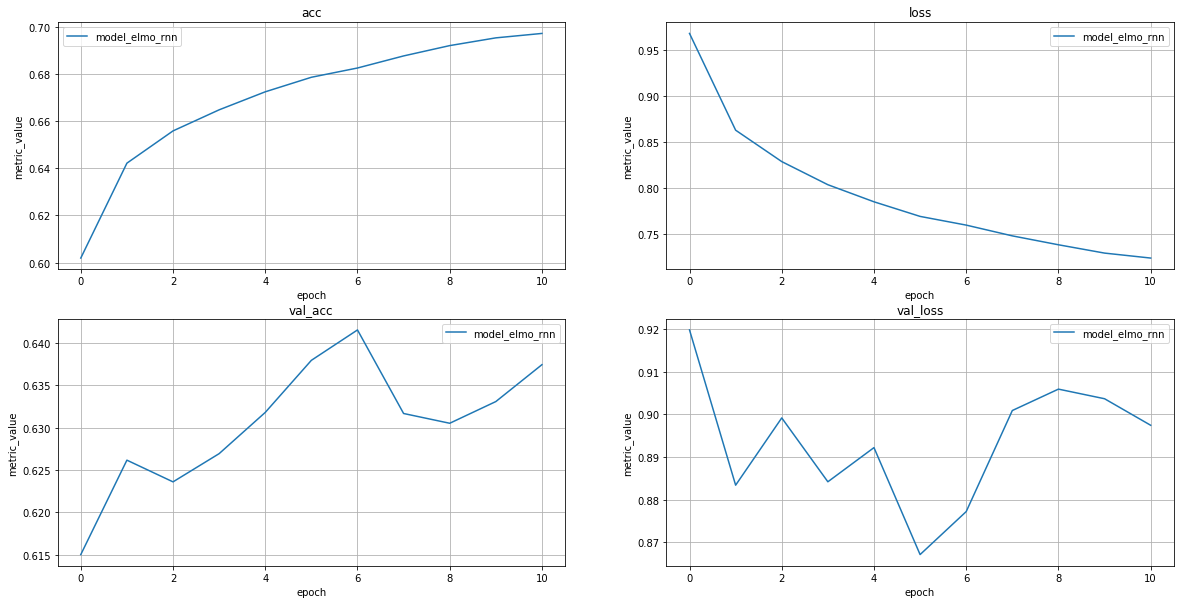

In [10]:
# training
model_elmo_rnn.fit(**fit_params);
model_elmo_rnn = save_report(model_elmo_rnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_rnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

### CNN

In [ ]:
from architecture.models import model_cnn

In [12]:
# parameters setting
elmo_params_cnn = {
    "trainable": True,
    "output_dim": 1024,
    "output_type": "elmo"
}

model_params_elmo_cnn = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_cnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_cnn"
model_elmo_cnn = model_cnn(model_params_elmo_cnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0523 04:33:14.843817 140464570181504 saver.py:1483] Saver not created because there are no variables in the graph to restore


Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 499s 4ms/sample - loss: 0.9543 - acc: 0.6108 - val_loss: 0.9117 - val_acc: 0.6106
Epoch 2/50
139999/139999 [==============================] - 479s 3ms/sample - loss: 0.8480 - acc: 0.6481 - val_loss: 0.8945 - val_acc: 0.6226
Epoch 3/50
139999/139999 [==============================] - 480s 3ms/sample - loss: 0.8028 - acc: 0.6645 - val_loss: 0.9092 - val_acc: 0.6215
Epoch 4/50
139999/139999 [==============================] - 479s 3ms/sample - loss: 0.7710 - acc: 0.6772 - val_loss: 0.9083 - val_acc: 0.6260
Epoch 5/50
139999/139999 [==============================] - 479s 3ms/sample - loss: 0.7449 - acc: 0.6882 - val_loss: 0.9117 - val_acc: 0.6244
Epoch 6/50
139999/139999 [==============================] - 479s 3ms/sample - loss: 0.7235 - acc: 0.6972 - val_loss: 0.9231 - val_acc: 0.6214
Epoch 7/50
139999/139999 [==============================] - 479s 3ms/sample - loss: 0.7055 - acc: 

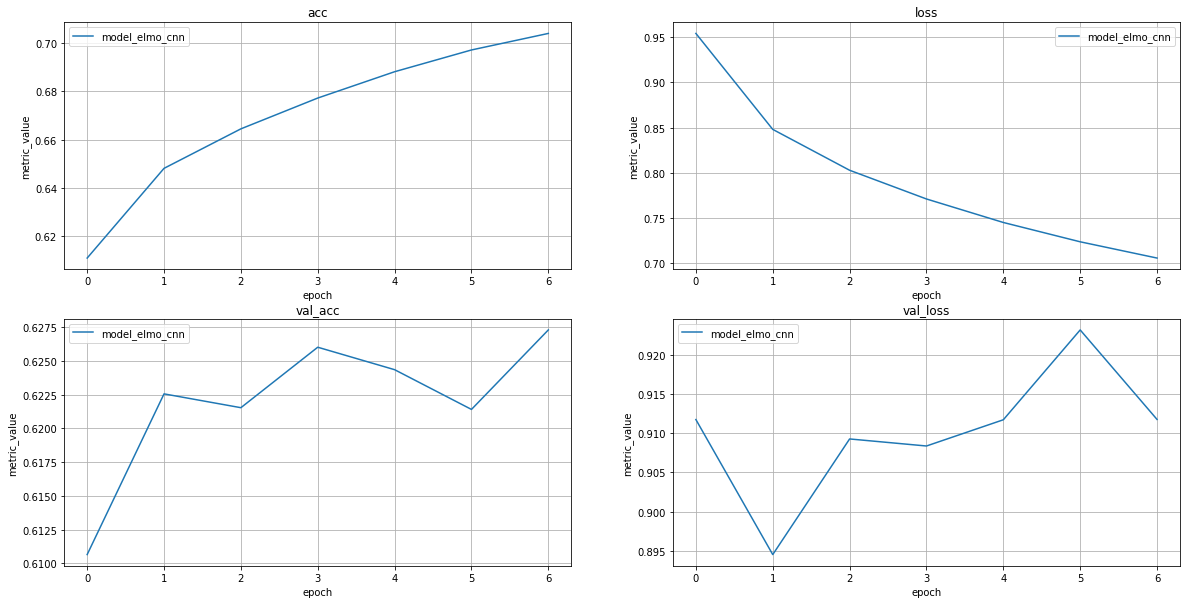

In [13]:
# training
model_elmo_cnn.fit(**fit_params);
model_elmo_cnn = save_report(model=model_elmo_cnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_cnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

## Phrase Level FFNN

In [ ]:
from architecture.models import model_ffnn

In [15]:
# parameters setting
elmo_params_ffnn = {
    "trainable": True,
    "output_dim": 1024,
    "output_type": "default"
}

params_elmo_raw = {
    "input_layer": "simple_input",
    "emb_layer": "Elmo",
    "input_params": input_params,
    "emb_params": elmo_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_ffnn"
model_elmo_ffnn = model_ffnn(params_elmo_raw)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0523 05:29:34.748897 140464570181504 saver.py:1483] Saver not created because there are no variables in the graph to restore


Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 467s 3ms/sample - loss: 0.9656 - acc: 0.6050 - val_loss: 0.9340 - val_acc: 0.6056
Epoch 2/50
139999/139999 [==============================] - 467s 3ms/sample - loss: 0.8732 - acc: 0.6364 - val_loss: 0.9216 - val_acc: 0.6091
Epoch 3/50
139999/139999 [==============================] - 469s 3ms/sample - loss: 0.8466 - acc: 0.6480 - val_loss: 0.9253 - val_acc: 0.6118
Epoch 4/50
139999/139999 [==============================] - 469s 3ms/sample - loss: 0.8237 - acc: 0.6576 - val_loss: 0.9131 - val_acc: 0.6178
Epoch 5/50
139999/139999 [==============================] - 469s 3ms/sample - loss: 0.8018 - acc: 0.6670 - val_loss: 0.9219 - val_acc: 0.6123
Epoch 6/50
139999/139999 [==============================] - 470s 3ms/sample - loss: 0.7824 - acc: 0.6746 - val_loss: 0.9359 - val_acc: 0.6132
Epoch 7/50
139999/139999 [==============================] - 469s 3ms/sample - loss: 0.7644 - acc: 

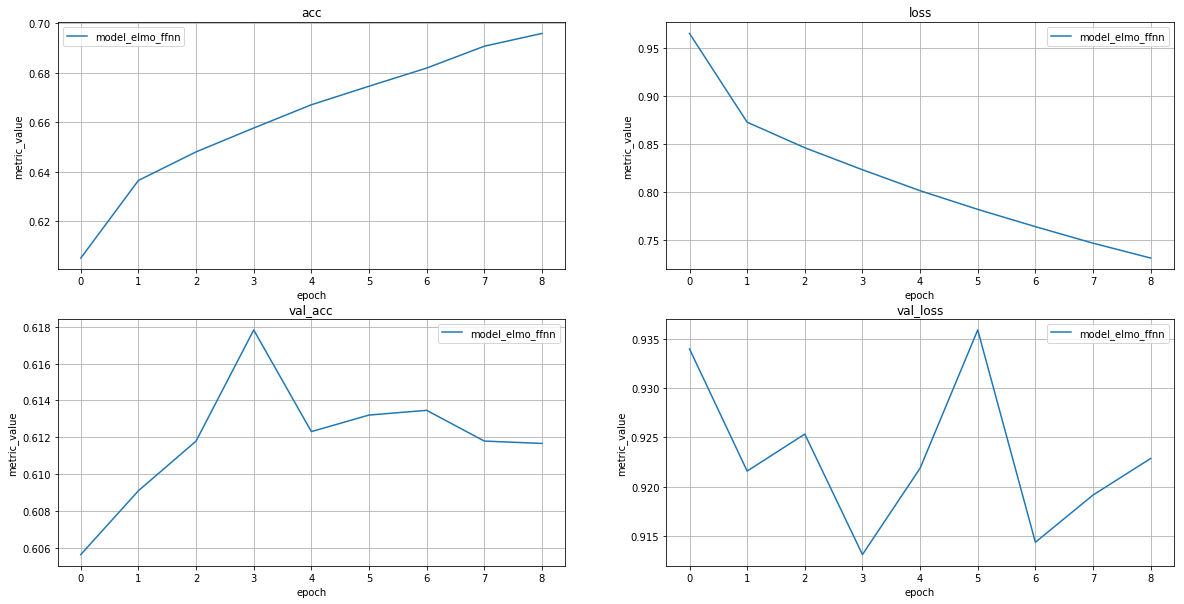

In [16]:
# training
model_elmo_ffnn.fit(**fit_params);
model_elmo_ffnn = save_report(model=model_elmo_ffnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_elmo_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

# Results

In [ ]:
test_result_dict

In [ ]:
from utils.utils_result import update_common_history_folder, display_results

In [ ]:
update_common_history_folder("about_model")
display_results("about_models/comparision")